## 💡 *Importing Libraries*

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import csv
import matplotlib.pyplot as plt
import os
from itertools import chain
import numpy as np

## 💡 *Functions for Performance Evaluation*

📌 **DETERMINING DEGREE ERROR, FSCORE, AND ACCURACY**

In [2]:
def correct_angles(angles_true, angles_predicted):
    # INPUTS: 
    angles_correct = []
    error_degrees = []
    for angle_predicted in angles_predicted:
        for angle_true in angles_true:
            if (angle_true+15 >= angle_predicted) and (angle_predicted >= angle_true-15):
                angles_correct.append(angle_predicted)
                error_degrees.append(abs(angle_predicted - angle_true))

    return angles_correct, error_degrees

def incorrect_angles(angles_true, angles_predicted):
    # INPUTS: 
    angles_correct = []
    angles_absent = []
    angles_not_excess = []
    angles_excess = []
    
    # angles_arr = [0, 30, 60, 90, 120, 150, 180]

    for angle_predicted in angles_predicted:
        for angle_true in angles_true:
            if (angle_true+15 >= angle_predicted) and (angle_predicted >= angle_true-15):
                angles_correct.append(angle_true)
                angles_not_excess.append(angle_predicted)
            # else:
            #     # for angle_arr in angles_arr:
            #     #     if (angle_arr+15 >= angle_predicted) and (angle_predicted>angle_arr-15):
            #     angles_excess.append(angle_predicted)
    
    for angle_true in angles_true:
        if angle_true not in angles_correct:
            angles_absent.append(angle_true)
    
    for angle_predicted in angles_predicted:
        if angle_predicted not in angles_not_excess:
            angles_excess.append(angle_predicted)

    return angles_absent, angles_excess

def F1Score(n_true, n_predicted, n_correct):
    R_rate = n_correct / n_true
    P_rate = n_correct / n_predicted
    if n_correct <= 0:
        F_score = 0
    else:
        F_score = 2*P_rate*R_rate / (P_rate+R_rate)
    return F_score

def performance_evaluation(instance_angles_true, instance_angles_predicted):
    # INPUTS: two 2D arrays of angles
    n_true = 0
    n_predicted = 0
    n_correct = 0
    error_degree_ave = 0
    n_correct_count = 0

    angles_true_nos = []
    angles_pred_nos = []

    for i in range(len(instance_angles_true)):
        angles_true, angles_predicted = instance_angles_true[i], instance_angles_predicted[i]

        angles_true_nos.append(len(angles_true))
        angles_pred_nos.append(len(angles_predicted))

        angles_correct, error_degrees = correct_angles(angles_true, angles_predicted)
        if not n_correct == 0:
            error_degree_ave = (error_degree_ave*n_correct + sum(error_degrees)) / (n_correct+len(angles_correct))
        else:
            error_degree_ave = 0

        if len(angles_true) == len(angles_predicted):
            n_correct_count += 1
            
        n_true += len(angles_true)
        n_predicted += len(angles_predicted)
        n_correct += len(angles_correct)
        
    cm = confusion_matrix(angles_true_nos, angles_pred_nos)

    f_score = F1Score(n_true, n_predicted, n_correct)
    accuracy = n_correct_count / len(instance_angles_true)
    accuracy_cm = cm.diagonal().sum() / cm.sum()

    # print(f'n_correct_count={n_correct_count} | len(instance_angles_true={len(instance_angles_true)}')
    # print(f'accuracy={accuracy} | accuracy_cm={accuracy_cm}')

    return error_degree_ave, f_score, accuracy_cm

## 💡 *Determining the Performance of Algorithm*

📌 **CODE FOR PERFORMANCE EVALUATION**

In [3]:
CSV_FOLDER = "data//"
CSV_FILE = 'lambd_TH-4, r_TH-0.9, rho_TH-0.3.csv'
CSV_PATH = f'{CSV_FOLDER}{CSV_FILE}'

angles_true = []
angles_pred = []

print(f'---> {CSV_FILE}')
with open(CSV_PATH, newline='') as csvfile:
    csv_reader = csv.DictReader(csvfile)

    for line in csv_reader:
        angles_true.append(list(map(float, line['angles_true'].split("_"))))
        angles_pred.append(list(map(float, line['angles_pred'].split("_"))))

# print(angles_pred)

error, fscore, accuracy = performance_evaluation(angles_true, angles_pred)
print(f'ave_error={error}° | F_score={fscore} | accuracy={accuracy}')

---> lambd_TH-4, r_TH-0.9, rho_TH-0.3.csv
ave_error=5.313530860308866° | F_score=0.6671309192200556 | accuracy=0.44285714285714284


📌 **PLOTTING F1 SCORE, ACCURACY, AND ERROR WITH RESPECT TO ρ_TH**

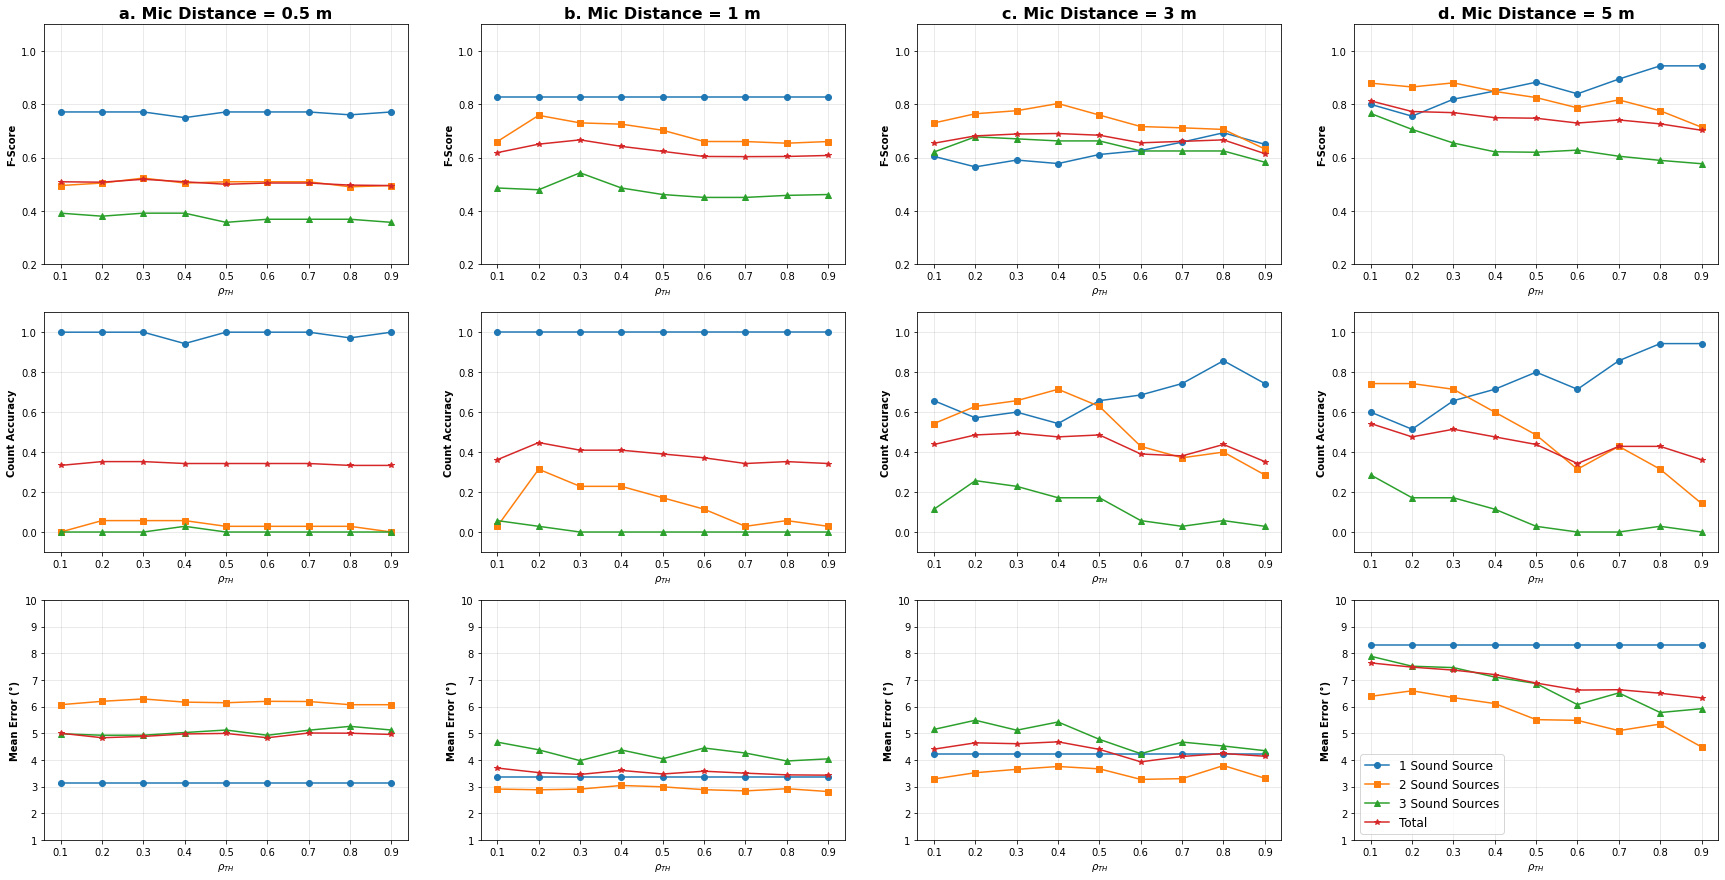

In [4]:
CSV_FOLDER_PATH = "data\\"
CSV_FOLDER = os.listdir(CSV_FOLDER_PATH)

rho_TH_arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mic_dist_arr = [0.5, 1, 3, 5]
num_sources_arr = [1, 2, 3]




fig, axs = plt.subplots(3, 4, figsize=(30, 15))

for j in range(len(mic_dist_arr)):
    
    fscore_arr = []
    accuracy_arr = []
    error_arr = []
    
    for rho_TH in rho_TH_arr:
        fscore_csv = []
        accuracy_csv = []
        error_csv = []

        for CSV_FILE in CSV_FOLDER:
            lambd_TH_csv, r_TH_csv, rho_TH_csv = CSV_FILE.split(', ')
            lambd_TH_csv, r_TH_csv, rho_TH_csv = float(lambd_TH_csv.replace('lambd_TH-', '')), float(r_TH_csv.replace('r_TH-', '')), float(rho_TH_csv.replace('rho_TH-', '').replace('.csv', ''))
            
            if (lambd_TH_csv == 4) and (r_TH_csv == 0.9) and (rho_TH_csv == rho_TH):
                # print(CSV_FILE)
                CSV_PATH = f'{CSV_FOLDER_PATH}{CSV_FILE}'

                with open(CSV_PATH, 'r') as csv_file:
                    csv_reader = csv.DictReader(csv_file)
                    lines = list(csv_reader)
                    
                    angles_true_total = []
                    angles_pred_total = []

                    for num_sources in num_sources_arr:
                        angles_true = []
                        angles_pred = []
                        
                        for line in lines:
                            if (float(line['num_sources']) == num_sources) and (float(line['mic_dist']) == mic_dist_arr[j]):
                                angles_true.append(list(map(float, line['angles_true'].split("_"))))
                                angles_pred.append(list(map(float, line['angles_pred'].split("_"))))
                                angles_true_total.append(list(map(float, line['angles_true'].split("_"))))
                                angles_pred_total.append(list(map(float, line['angles_pred'].split("_"))))
                            
                        
                        error, fscore, accuracy = performance_evaluation(angles_true, angles_pred)
                        fscore_csv.append(fscore)
                        accuracy_csv.append(accuracy)
                        error_csv.append(error)

                    error, fscore, accuracy = performance_evaluation(angles_true_total, angles_pred_total)
                    fscore_csv.append(fscore)
                    accuracy_csv.append(accuracy)
                    error_csv.append(error)

        fscore_arr.append(fscore_csv)
        accuracy_arr.append(accuracy_csv)
        error_arr.append(error_csv)

    fscore_arr_T = list(map(list, zip(*fscore_arr)))
    accuracy_arr_T = list(map(list, zip(*accuracy_arr)))
    error_arr_T = list(map(list, zip(*error_arr)))
    markers = ['o', 's', '^', '*']
    labels = ['1 Sound Source', '2 Sound Sources', '3 Sound Sources', 'Total']

    

    for i in range(len(fscore_arr_T)):
        axs[0, j].plot(rho_TH_arr, fscore_arr_T[i], marker=markers[i], label=labels[i])
        axs[0, j].set_xlabel(r'$\rho_{TH}$', fontweight='bold', fontsize='10')
        axs[0, j].set_ylabel('F-Score', fontweight='bold', fontsize='10')
        axs[0, j].set_ylim(0.2, 1.1)
        axs[0, j].grid(True, color='gray', alpha=0.2)
        axs[1, j].plot(rho_TH_arr, accuracy_arr_T[i], marker=markers[i], label=labels[i])
        axs[1, j].set_xlabel(r'$\rho_{TH}$', fontweight='bold', fontsize='10')
        axs[1, j].set_ylabel('Count Accuracy', fontweight='bold', fontsize='10')
        axs[1, j].set_ylim(-0.1, 1.1)
        axs[1, j].grid(True, color='gray', alpha=0.2)
        axs[2, j].plot(rho_TH_arr, error_arr_T[i], marker=markers[i], label=labels[i])
        axs[2, j].set_xlabel(r'$\rho_{TH}$', fontweight='bold', fontsize='10')
        axs[2, j].set_ylabel('Mean Error (°)', fontweight='bold', fontsize='10')
        axs[2, j].set_ylim(1, 10)
        axs[2, j].grid(True, color='gray', alpha=0.2)

axs[0, 0].set_title('a. Mic Distance = 0.5 m', fontweight='bold', fontsize='16')
axs[0, 1].set_title('b. Mic Distance = 1 m', fontweight='bold', fontsize='16')
axs[0, 2].set_title('c. Mic Distance = 3 m', fontweight='bold', fontsize='16')
axs[0, 3].set_title('d. Mic Distance = 5 m', fontweight='bold', fontsize='16')

plt.legend(fontsize=12)
# plt.savefig('fig_rho_TH.svg')
# plt.savefig('fig_rho_TH.pdf')
plt.savefig('images//fig_rho_TH.jpg')
plt.show()

📌 **PLOTTING F1 SCORE, ACCURACY, AND ERROR WITH RESPECT TO λ_TH** 

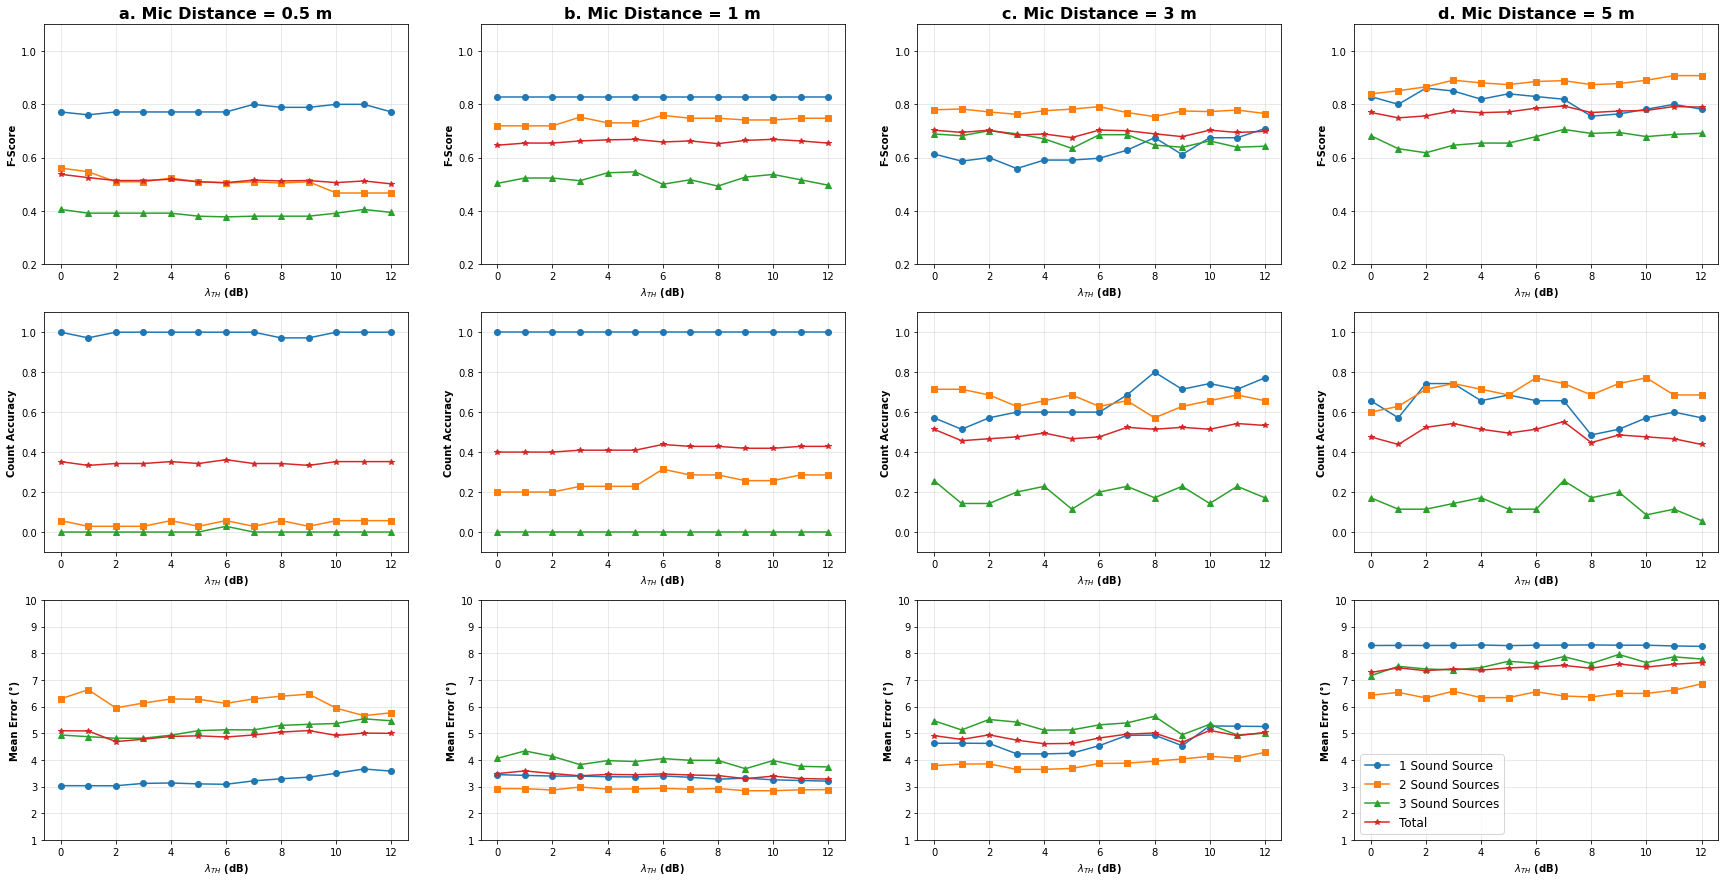

In [5]:
CSV_FOLDER_PATH = "data//"
CSV_FOLDER = os.listdir(CSV_FOLDER_PATH)

rho_TH_arr = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mic_dist_arr = [0.5, 1, 3, 5]
num_sources_arr = [1, 2, 3]
lambd_TH_arr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]



fig, axs = plt.subplots(3, 4, figsize=(30, 15))

for j in range(len(mic_dist_arr)):
    
    fscore_arr = []
    accuracy_arr = []
    error_arr = []
    
    for lambd_TH in lambd_TH_arr:
        fscore_csv = []
        accuracy_csv = []
        error_csv = []

        for CSV_FILE in CSV_FOLDER:
            lambd_TH_csv, r_TH_csv, rho_TH_csv = CSV_FILE.split(', ')
            lambd_TH_csv, r_TH_csv, rho_TH_csv = float(lambd_TH_csv.replace('lambd_TH-', '')), float(r_TH_csv.replace('r_TH-', '')), float(rho_TH_csv.replace('rho_TH-', '').replace('.csv', ''))
            
            if (lambd_TH_csv == lambd_TH) and (r_TH_csv == 0.9) and (rho_TH_csv == 0.3):
                # print(CSV_FILE)
                CSV_PATH = f'{CSV_FOLDER_PATH}{CSV_FILE}'

                with open(CSV_PATH, 'r') as csv_file:
                    csv_reader = csv.DictReader(csv_file)
                    lines = list(csv_reader)
                    
                    angles_true_total = []
                    angles_pred_total = []

                    for num_sources in num_sources_arr:
                        angles_true = []
                        angles_pred = []
                        
                        for line in lines:
                            if (float(line['num_sources']) == num_sources) and (float(line['mic_dist']) == mic_dist_arr[j]):
                                angles_true.append(list(map(float, line['angles_true'].split("_"))))
                                angles_pred.append(list(map(float, line['angles_pred'].split("_"))))
                                angles_true_total.append(list(map(float, line['angles_true'].split("_"))))
                                angles_pred_total.append(list(map(float, line['angles_pred'].split("_"))))
                            
                        
                        error, fscore, accuracy = performance_evaluation(angles_true, angles_pred)
                        fscore_csv.append(fscore)
                        accuracy_csv.append(accuracy)
                        error_csv.append(error)
                        # print(f'num_sources={num_sources} | mic_dist={mic_dist_arr[j]}')
                        # print(f'ave_error={error}° | F_score={fscore} | accuracy={accuracy}')
                    
                    error, fscore, accuracy = performance_evaluation(angles_true_total, angles_pred_total)
                    fscore_csv.append(fscore)
                    accuracy_csv.append(accuracy)
                    error_csv.append(error)
                    # print(f'num_sources=total | mic_dist={mic_dist_arr[j]}')
                    # print(f'ave_error={error}° | F_score={fscore} | accuracy={accuracy}')

                    # print(f'fscore_arr={fscore_csv}')
                    # print(f'accuracy_arr={accuracy_csv}')
                    # print(f'error_arr={error_csv}\n')
        fscore_arr.append(fscore_csv)
        accuracy_arr.append(accuracy_csv)
        error_arr.append(error_csv)

    # print(f'fscore_arr={fscore_arr}')
    # print(f'accuracy_arr={accuracy_arr}')
    # print(f'error_arr={error_arr}')

    fscore_arr_T = list(map(list, zip(*fscore_arr)))
    accuracy_arr_T = list(map(list, zip(*accuracy_arr)))
    error_arr_T = list(map(list, zip(*error_arr)))
    markers = ['o', 's', '^', '*']
    labels = ['1 Sound Source', '2 Sound Sources', '3 Sound Sources', 'Total']

    

    for i in range(len(fscore_arr_T)):
        axs[0, j].plot(lambd_TH_arr, fscore_arr_T[i], marker=markers[i], label=labels[i])
        axs[0, j].set_xlabel(r'$\lambda_{TH}$ (dB)', fontweight='bold', fontsize='10')
        axs[0, j].set_ylabel('F-Score', fontweight='bold', fontsize='10')
        axs[0, j].set_ylim(0.2, 1.1)
        axs[0, j].grid(True, color='gray', alpha=0.2)
        axs[1, j].plot(lambd_TH_arr, accuracy_arr_T[i], marker=markers[i], label=labels[i])
        axs[1, j].set_xlabel(r'$\lambda_{TH}$ (dB)', fontweight='bold', fontsize='10')
        axs[1, j].set_ylabel('Count Accuracy', fontweight='bold', fontsize='10')
        axs[1, j].set_ylim(-0.1, 1.1)
        axs[1, j].grid(True, color='gray', alpha=0.2)
        axs[2, j].plot(lambd_TH_arr, error_arr_T[i], marker=markers[i], label=labels[i])
        axs[2, j].set_xlabel(r'$\lambda_{TH}$ (dB)', fontweight='bold', fontsize='10')
        axs[2, j].set_ylabel('Mean Error (°)', fontweight='bold', fontsize='10')
        axs[2, j].set_ylim(1, 10)
        axs[2, j].grid(True, color='gray', alpha=0.2)

axs[0, 0].set_title('a. Mic Distance = 0.5 m', fontweight='bold', fontsize='16')
axs[0, 1].set_title('b. Mic Distance = 1 m', fontweight='bold', fontsize='16')
axs[0, 2].set_title('c. Mic Distance = 3 m', fontweight='bold', fontsize='16')
axs[0, 3].set_title('d. Mic Distance = 5 m', fontweight='bold', fontsize='16')

plt.legend(fontsize=12)
# plt.savefig('fig_lambda_TH.svg')
# plt.savefig('fig_lambda_TH.pdf')
plt.savefig('images//fig_lambda_TH.jpg')
plt.show()

📌 **VISUALIZING CONFUSION MATRIX WITH RESPECT TO MIC DISTANCE**

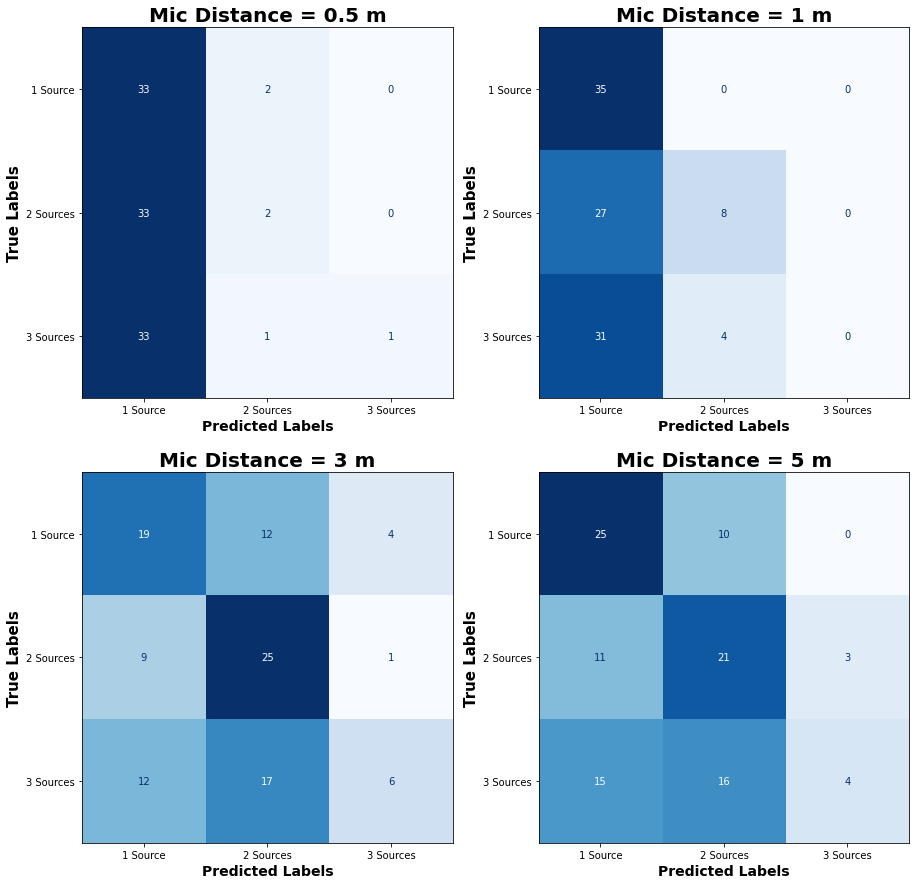

In [6]:
CSV_FOLDER_PATH = "data//"
CSV_FILE = "lambd_TH-4, r_TH-0.9, rho_TH-0.4.csv"
CSV_PATH = f'{CSV_FOLDER_PATH}{CSV_FILE}'
mic_dist_arr = [0.5, 1, 3, 5]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
labels1 = ['1 Source', '2 Sources', '3 Sources']
labels2 = ['1 Source', '2 Sources', '3 Sources', '4 Sources']

for j in range(len(mic_dist_arr)):

    with open(CSV_PATH, 'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        lines = list(csv_reader)
        
        angles_true_nos = []
        angles_pred_nos = []

        for line in lines:
            if (float(line['mic_dist']) == mic_dist_arr[j]):
                angles_true_nos.append(len(line['angles_true'].split("_")))
                angles_pred_nos.append(len(line['angles_pred'].split("_")))

    # print(f'angles_true_nos={angles_true_nos}')
    # print(f'angles_pred_nos={angles_pred_nos}')

    cm = confusion_matrix(angles_true_nos, angles_pred_nos)
    
    if 4 in angles_pred_nos:
        labels = labels2
    else:
        labels = labels1
    

    if j == 0:
        disp0 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp0.plot(ax=axs[0,0], cmap='Blues', colorbar=False)
        axs[0,0].set_title(f'Mic Distance = {mic_dist_arr[j]} m', fontweight='bold', fontsize='20')
        axs[0,0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='14')
        axs[0,0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
    elif j == 1:
        disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp1.plot(ax=axs[0,1], cmap='Blues', colorbar=False)
        axs[0,1].set_title(f'Mic Distance = {mic_dist_arr[j]} m', fontweight='bold', fontsize='20')
        axs[0,1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='14')
        axs[0,1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
    elif j == 2:
        disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp2.plot(ax=axs[1,0], cmap='Blues', colorbar=False)
        axs[1,0].set_title(f'Mic Distance = {mic_dist_arr[j]} m', fontweight='bold', fontsize='20')
        axs[1,0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='14')
        axs[1,0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
    elif j == 3:
        disp3 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp3.plot(ax=axs[1,1], cmap='Blues', colorbar=False)
        axs[1,1].set_title(f'Mic Distance = {mic_dist_arr[j]} m', fontweight='bold', fontsize='20')
        axs[1,1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='14')
        axs[1,1].set_ylabel('True Labels', fontweight='bold', fontsize='15')


# plt.savefig('fig_confusion_matrix_rho_TH-0.4.svg')
# plt.savefig('fig_confusion_matrix_rho_TH-0.4.pdf')
plt.savefig('images//fig_confusion_matrix_rho_TH-0.4.jpg')
plt.show()

📌 **VISUALIZING ANGLE ERROR WITH RESPECT TO MIC DISTANCE AND NUMBER OF SOURCES**

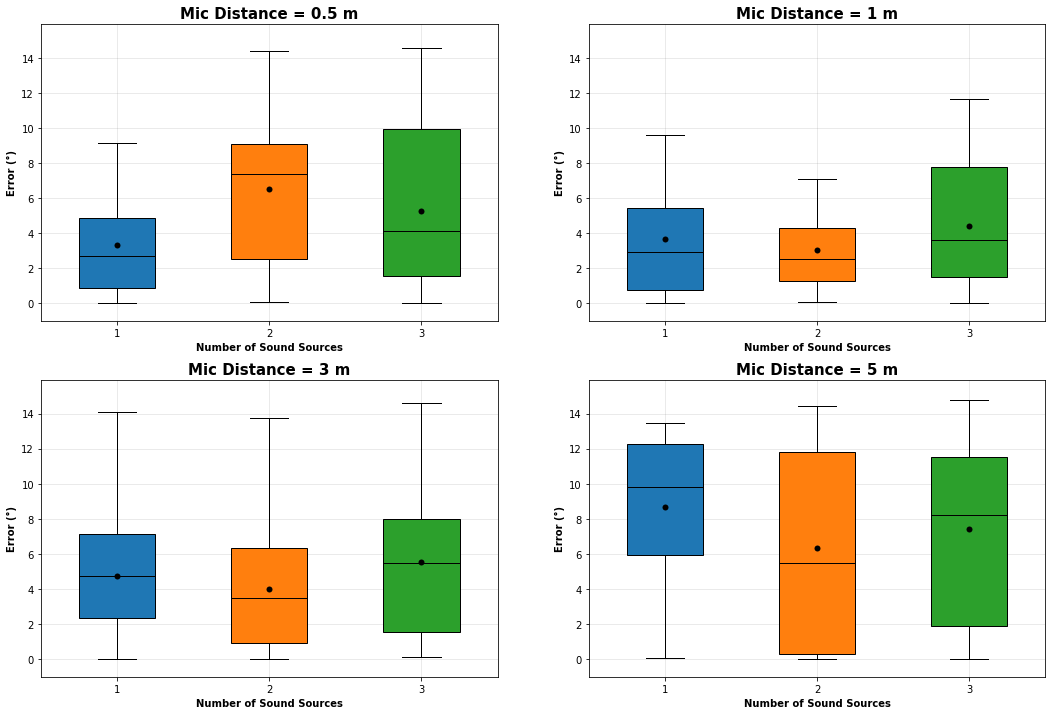

In [7]:
CSV_FOLDER_PATH = "data//"
CSV_FILE = "lambd_TH-4, r_TH-0.9, rho_TH-0.4.csv"
CSV_PATH = f'{CSV_FOLDER_PATH}{CSV_FILE}'
mic_dist_arr = [0.5, 1, 3, 5]
num_sources_arr = [1, 2, 3]
# labels = ['1 Source', '2 Sources', '3 Sources']


fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for j in range(len(mic_dist_arr)):
    error_degrees_data = []
    
    for num_sources in num_sources_arr:
    
        with open(CSV_PATH, 'r') as csv_file:
            csv_reader = csv.DictReader(csv_file)
            lines = list(csv_reader)

            error_degrees_arr = []
            error_degrees_arr_edit = []

            for line in lines:
                if (float(line['mic_dist']) == mic_dist_arr[j]) and (float(line['num_sources']) == num_sources):
                    _, error_degrees = correct_angles(list(map(float, line['angles_true'].split("_"))), list(map(float, line['angles_pred'].split("_"))))
                    error_degrees_arr.append(error_degrees)
            
            for x in error_degrees_arr:
                if x:
                    error_degrees_arr_edit.append(x)

            error_degrees_arr_edit = list(chain(*error_degrees_arr_edit))
            error_degrees_data.append(error_degrees_arr_edit)

    # plot
    if j == 0:
        VP = axs[0,0].boxplot(error_degrees_data, widths=0.5,
                        showmeans=True, showfliers=False, patch_artist=True,
                        medianprops={"color": "black", "linestyle": "-", "linewidth": 1},
                        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black",
                                "markersize": 6, "markeredgewidth": 0})
        axs[0,0].set_xlabel('Number of Sound Sources', fontweight='bold', fontsize='10')
        axs[0,0].set_ylabel('Error (°)', fontweight='bold', fontsize='10')
        axs[0,0].set_title(f'Mic Distance = {mic_dist_arr[j]} m', fontweight='bold', fontsize='15')
        axs[0,0].grid(True, color='gray', alpha=0.2)
        axs[0,0].set_ylim(-1, 15.9)

    elif j == 1:
        VP = axs[0,1].boxplot(error_degrees_data, widths=0.5,
                        showmeans=True, showfliers=False, patch_artist=True,
                        medianprops={"color": "black", "linestyle": "-", "linewidth": 1},
                        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black",
                                "markersize": 6, "markeredgewidth": 0})
        axs[0,1].set_xlabel('Number of Sound Sources', fontweight='bold', fontsize='10')
        axs[0,1].set_ylabel('Error (°)', fontweight='bold', fontsize='10')
        axs[0,1].set_title(f'Mic Distance = {mic_dist_arr[j]} m', fontweight='bold', fontsize='15')
        axs[0,1].grid(True, color='gray', alpha=0.2)
        axs[0,1].set_ylim(-1, 15.9)

    elif j == 2:
        VP = axs[1,0].boxplot(error_degrees_data, widths=0.5,
                        showmeans=True, showfliers=False, patch_artist=True,
                        medianprops={"color": "black", "linestyle": "-", "linewidth": 1},
                        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black",
                                "markersize": 6, "markeredgewidth": 0})
        axs[1,0].set_xlabel('Number of Sound Sources', fontweight='bold', fontsize='10')
        axs[1,0].set_ylabel('Error (°)', fontweight='bold', fontsize='10')
        axs[1,0].set_title(f'Mic Distance = {mic_dist_arr[j]} m', fontweight='bold', fontsize='15')
        axs[1,0].grid(True, color='gray', alpha=0.2)
        axs[1,0].set_ylim(-1, 15.9)

    elif j == 3:
        VP = axs[1,1].boxplot(error_degrees_data, widths=0.5,
                        showmeans=True, showfliers=False, patch_artist=True,
                        medianprops={"color": "black", "linestyle": "-", "linewidth": 1},
                        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black",
                                "markersize": 6, "markeredgewidth": 0})
        axs[1,1].set_xlabel('Number of Sound Sources', fontweight='bold', fontsize='10')
        axs[1,1].set_ylabel('Error (°)', fontweight='bold', fontsize='10')
        axs[1,1].set_title(f'Mic Distance = {mic_dist_arr[j]} m', fontweight='bold', fontsize='15')
        axs[1,1].grid(True, color='gray', alpha=0.2)
        axs[1,1].set_ylim(-1, 15.9)

    colors = ['C0', 'C1', 'C2']
    for patch, color in zip(VP['boxes'], colors):
        patch.set_facecolor(color)

# plt.savefig('fig_error_range_rho_TH-0.4.svg')
# plt.savefig('fig_error_range_rho_TH-0.4.pdf')
plt.savefig('images//fig_error_range_rho_TH-0.4.jpg')
plt.show()

📌 **VISUALIZING NONDETECTION RATE WITH RESPECT TO SOUND SOURCE POSITION**

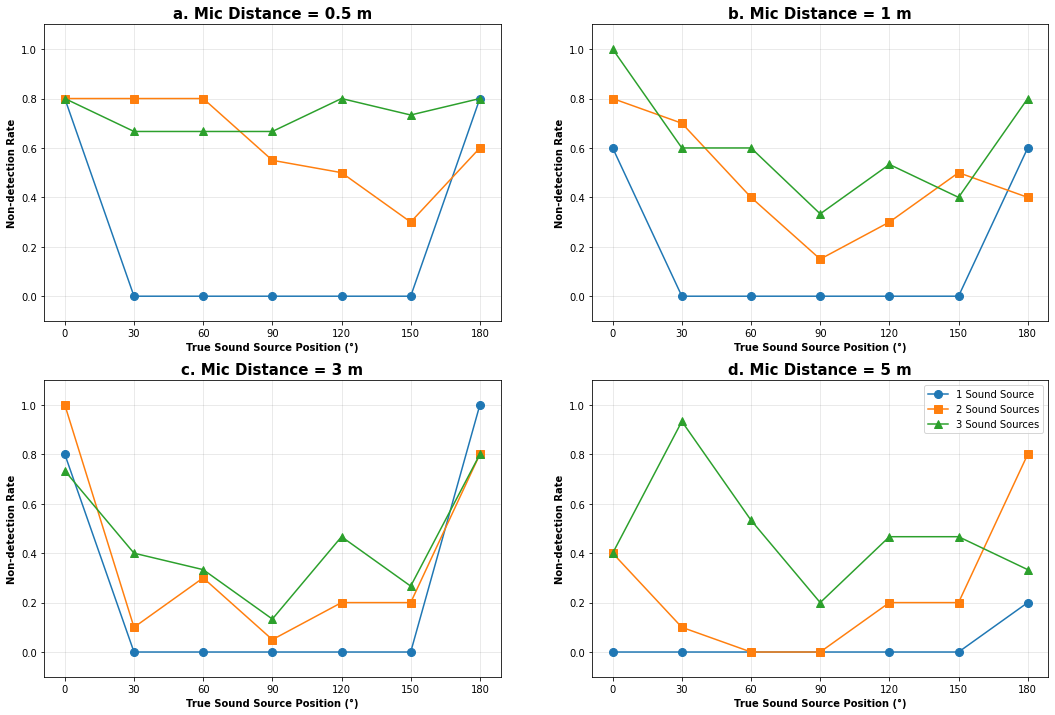

In [8]:
CSV_FOLDER_PATH = "data//"
CSV_FILE = "lambd_TH-4, r_TH-0.9, rho_TH-0.3.csv"
CSV_PATH = f'{CSV_FOLDER_PATH}{CSV_FILE}'
mic_dist_arr = [0.5, 1, 3, 5]
num_sources_arr = [1, 2, 3]
# labels = ['1 Source', '2 Sources', '3 Sources']
angles_arr = [0, 30, 60, 90, 120, 150, 180]
markers = ['o', 's', '^']
labels = ['1 Sound Source', '2 Sound Sources', '3 Sound Sources']
angles_nos_arr = [[5, 5, 5, 5, 5, 5, 5],
                  [5, 10, 10, 20, 10, 10, 5],
                  [15, 15, 15, 15, 15, 15, 15],]

fig, axs = plt.subplots(2, 2, figsize=(18, 12))

for j in range(len(mic_dist_arr)):
    angles_absent_data = []
    unique_angles_data = []

    
    for i in range(len(num_sources_arr)):
    
        with open(CSV_PATH, 'r') as csv_file:
            csv_reader = csv.DictReader(csv_file)
            lines = list(csv_reader)

            angles_absent_arr = []
            angles_absent_arr_edit = []

            for line in lines:
                if (float(line['mic_dist']) == mic_dist_arr[j]) and (float(line['num_sources']) == num_sources_arr[i]):
                    angles_absent, _ = incorrect_angles(list(map(float, line['angles_true'].split("_"))), list(map(float, line['angles_pred'].split("_"))))
                    angles_absent_arr.append(angles_absent)
            
            for x in angles_absent_arr:
                if x:
                    angles_absent_arr_edit.append(x)
            
            
            
            angles_absent_arr_edit = list(chain(*angles_absent_arr_edit))
            
            unique_angles, counts = np.unique(angles_absent_arr_edit, return_counts=True)
            unique_angles, counts = np.array(unique_angles), np.array(counts)
            # print(f'unique_angles={unique_angles}')
            # print(f'counts={counts}')


            for k in range(len(angles_arr)):
                if angles_arr[k] not in unique_angles:
                    counts = np.insert(counts, k, 0)
                    unique_angles = np.insert(unique_angles, k, angles_arr[k])
            

            # print(f'unique_angles={unique_angles}')
            # print(f'counts={counts}')
            angles_absent_data.append(angles_absent_arr_edit)
        
            if j == 0:
                axs[0,0].plot(unique_angles, counts/angles_nos_arr[i], marker=markers[i], markersize=8, label=labels[i])
                axs[0,0].set_xticks(angles_arr)
                axs[0,0].set_xlabel('True Sound Source Position (°)', fontweight='bold', fontsize='10')
                axs[0,0].set_ylabel('Non-detection Rate', fontweight='bold', fontsize='10')
                axs[0,0].set_title('a. Mic Distance = 0.5 m', fontweight='bold', fontsize='15')
                axs[0,0].grid(True, color='gray', alpha=0.2)
                axs[0,0].set_ylim(-0.1, 1.1)
            if j == 1:
                axs[0,1].plot(unique_angles, counts/angles_nos_arr[i], marker=markers[i], markersize=8, label=labels[i])
                axs[0,1].set_xticks(angles_arr)
                axs[0,1].set_xlabel('True Sound Source Position (°)', fontweight='bold', fontsize='10')
                axs[0,1].set_ylabel('Non-detection Rate', fontweight='bold', fontsize='10')
                axs[0,1].set_title('b. Mic Distance = 1 m', fontweight='bold', fontsize='15')
                axs[0,1].grid(True, color='gray', alpha=0.2)
                axs[0,1].set_ylim(-0.1, 1.1)
            if j == 2:
                axs[1,0].plot(unique_angles, counts/angles_nos_arr[i], marker=markers[i], markersize=8, label=labels[i])
                axs[1,0].set_xticks(angles_arr)
                axs[1,0].set_xlabel('True Sound Source Position (°)', fontweight='bold', fontsize='10')
                axs[1,0].set_ylabel('Non-detection Rate', fontweight='bold', fontsize='10')
                axs[1,0].set_title('c. Mic Distance = 3 m', fontweight='bold', fontsize='15')
                axs[1,0].grid(True, color='gray', alpha=0.2)
                axs[1,0].set_ylim(-0.1, 1.1)
            if j == 3:
                axs[1,1].plot(unique_angles, counts/angles_nos_arr[i], marker=markers[i], markersize=8, label=labels[i])
                axs[1,1].set_xticks(angles_arr)
                axs[1,1].set_xlabel('True Sound Source Position (°)', fontweight='bold', fontsize='10')
                axs[1,1].set_ylabel('Non-detection Rate', fontweight='bold', fontsize='10')
                axs[1,1].set_title('d. Mic Distance = 5 m', fontweight='bold', fontsize='15')
                axs[1,1].grid(True, color='gray', alpha=0.2)
                axs[1,1].set_ylim(-0.1, 1.1)

    # print(f'angles_absent_data={angles_absent_data}')
    
    


plt.legend()
# plt.savefig('fig_nondetection_instances_rho_TH-0.3.svg')
# plt.savefig('fig_nondetection_instances_rho_TH-0.3.pdf')
plt.savefig('images//fig_nondetection_instances_rho_TH-0.3.jpg')
plt.show()

📌 **VISUALIZING MISDETECTION RATE WITH RESPECT TO SOUND SOURCE POSITION**

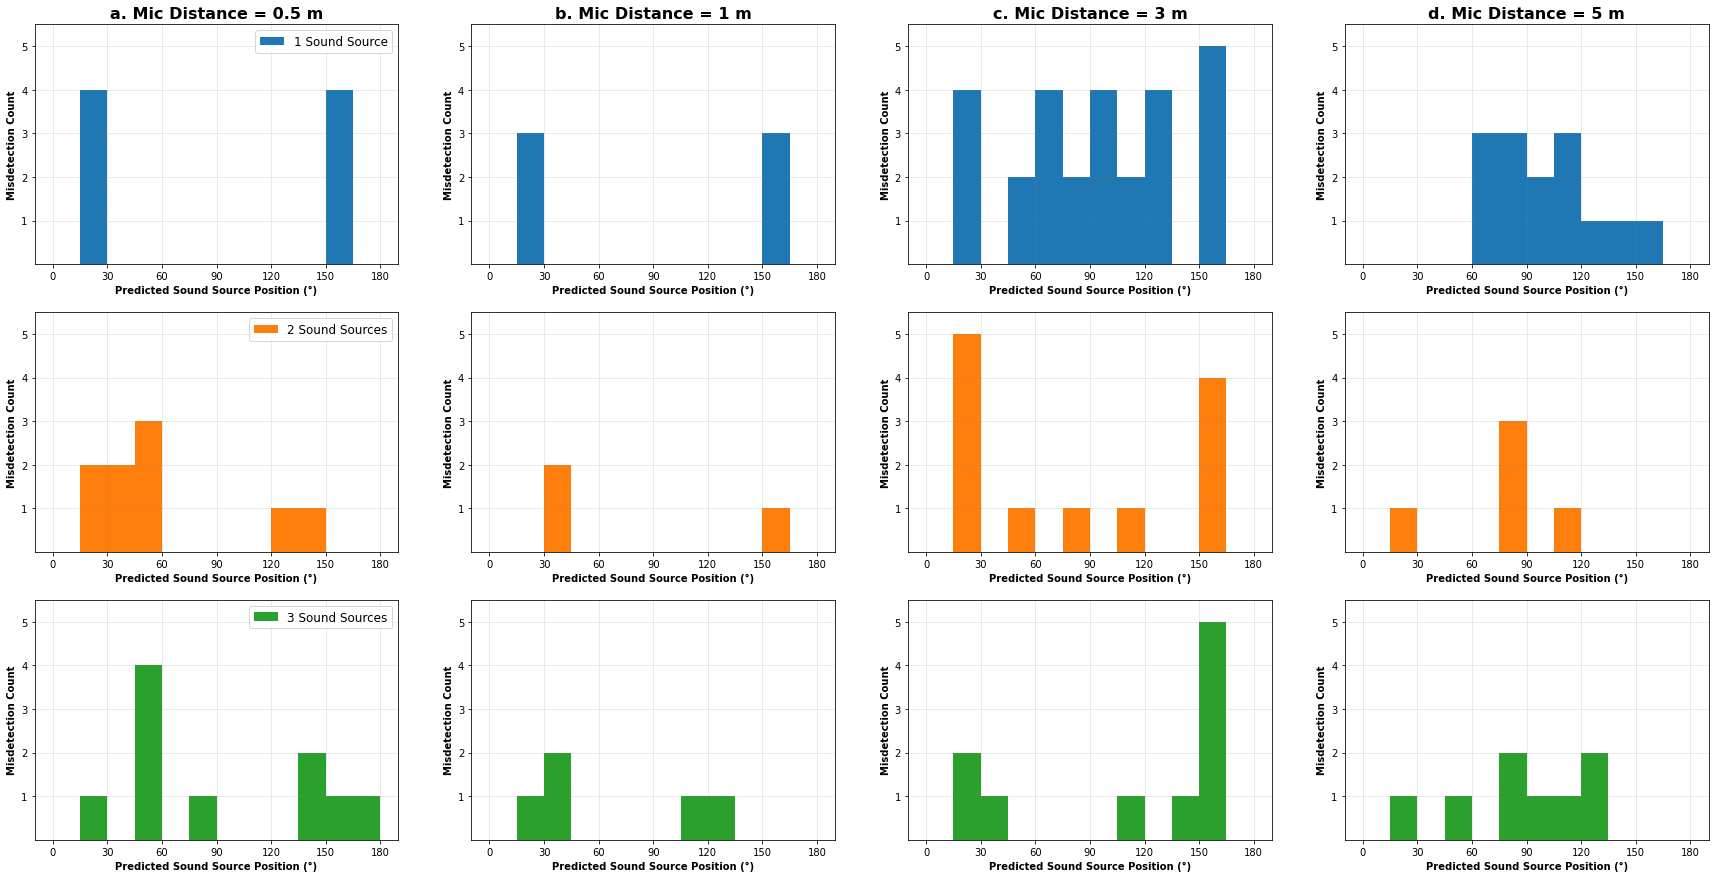

In [9]:
CSV_FOLDER_PATH = "data//"
CSV_FILE = "lambd_TH-4, r_TH-0.9, rho_TH-0.3.csv"
CSV_PATH = f'{CSV_FOLDER_PATH}{CSV_FILE}'
mic_dist_arr = [0.5, 1, 3, 5]
num_sources_arr = [1, 2, 3]
angles_arr = [0, 30, 60, 90, 120, 150, 180]
yticks_arr = [1, 2, 3, 4, 5]
abcd = ['a', 'b', 'c', 'd']
markers = ['o', 's', '^']
# labels = ['1 Sound Source', '2 Sound Sources', '3 Sound Sources']
angles_nos_arr = [[5, 5, 5, 5, 5, 5, 5],
                  [5, 10, 10, 20, 10, 10, 5],
                  [15, 15, 15, 15, 15, 15, 15],]

fig, axs = plt.subplots(3, 4, figsize=(30, 15))

labels = ['1 Sound Source', '2 Sound Sources', '3 Sound Sources']
colors = ['C0', 'C1', 'C2']

for j in range(len(mic_dist_arr)):
    angles_excess_data = []

    
    for i in range(len(num_sources_arr)):
    
        with open(CSV_PATH, 'r') as csv_file:
            csv_reader = csv.DictReader(csv_file)
            lines = list(csv_reader)

            angles_excess_arr = []
            angles_excess_arr_edit = []

            for line in lines:
                if (float(line['mic_dist']) == mic_dist_arr[j]) and (float(line['num_sources']) == num_sources_arr[i]):
                    _, angles_excess = incorrect_angles(list(map(float, line['angles_true'].split("_"))), list(map(float, line['angles_pred'].split("_"))))
                    angles_excess_arr.append(angles_excess)
            
            for x in angles_excess_arr:
                if x:
                    angles_excess_arr_edit.append(x)
            
            angles_excess_arr_edit = list(chain(*angles_excess_arr_edit))
            # print(f'angles_excess_arr_edit={angles_excess_arr_edit}')
            
            
            angles_excess_data.append(angles_excess_arr_edit)


            axs[i,j].hist(angles_excess_arr_edit, bins=np.arange(0, 195, 15), histtype='bar', color=colors[i], label=labels[i])
            axs[i,j].set_xlim(-10, 190)
            axs[i,j].set_ylim(0, 5.5)
            axs[i,j].set_xticks(angles_arr)
            axs[i,j].set_yticks(yticks_arr)
            axs[i,j].set_xlabel('Predicted Sound Source Position (°)', fontweight='bold', fontsize='10')
            axs[i,j].set_ylabel(f'Misdetection Count', fontweight='bold', fontsize='10')
            axs[i,j].grid(True, color='gray', alpha=0.2)
    
    axs[0,j].set_title(f'{abcd[j]}. Mic Distance = {mic_dist_arr[j]} m', fontweight='bold', fontsize='16')

axs[0,0].legend(fontsize=12)
axs[1,0].legend(fontsize=12)
axs[2,0].legend(fontsize=12)

# plt.savefig('fig_misdetection_instances_rho_TH-0.3.svg')
# plt.savefig('fig_misdetection_instances_rho_TH-0.3.pdf')
plt.savefig('images//fig_misdetection_instances_rho_TH-0.3.jpg')
plt.show()

📌 **VISUALIZING PERFORMANCE VS MICROPHONE DISTANCE AND NUMBER OF SOUND SOURCES**

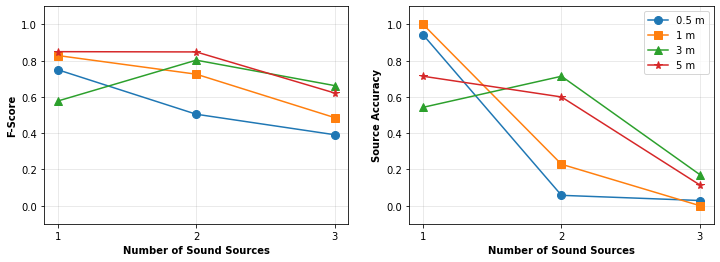

In [10]:
CSV_FOLDER_PATH = "data//"
CSV_FILE = "lambd_TH-4, r_TH-0.9, rho_TH-0.4.csv"
CSV_PATH = f'{CSV_FOLDER_PATH}{CSV_FILE}'

mic_dist_arr = [0.5, 1, 3, 5]
num_sources_arr = [1, 2, 3]

# markers = ['o', 's', '^', '*']
labels = ['0.5 m', '1 m', '3 m', '5 m']

fig, axs = plt.subplots(1, 2, figsize=(12, 4))


fscore_arr = []
accuracy_arr = []
# error_arr = []


with open(CSV_PATH, 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    lines = list(csv_reader)

    for num_sources in num_sources_arr:

        fscore_mic = []
        accuracy_mic = []

        for mic_dist in mic_dist_arr:
            angles_true = []
            angles_pred = []

            for line in lines:
                if (float(line['num_sources']) == num_sources) and (float(line['mic_dist']) == mic_dist):
                    angles_true.append(list(map(float, line['angles_true'].split("_"))))
                    angles_pred.append(list(map(float, line['angles_pred'].split("_"))))

            _, fscore, accuracy = performance_evaluation(angles_true, angles_pred)

            fscore_mic.append(fscore)
            accuracy_mic.append(accuracy)
            # error_arr.append(error)
        
        fscore_arr.append(fscore_mic)
        accuracy_arr.append(accuracy_mic)

# print(f'fscore_arr={fscore_arr}')
# print(f'accuracy_arr={accuracy_arr}')

markers = ['o', 's', '^', '*']
fscore_arr_T = list(map(list, zip(*fscore_arr)))
accuracy_arr_T = list(map(list, zip(*accuracy_arr)))

# print(f'fscore_arr_T={fscore_arr_T}')
# print(f'accuracy_arr_T={accuracy_arr_T}')

markers = ['o', 's', '^', '*']
for i in range(len(fscore_arr_T)):
    axs[0].plot(num_sources_arr, fscore_arr_T[i], label=labels[i], marker=markers[i], markersize=8)
    axs[1].plot(num_sources_arr, accuracy_arr_T[i], label=labels[i], marker=markers[i], markersize=8)


axs[0].set_xticks(num_sources_arr)
axs[0].set_xlabel('Number of Sound Sources', fontweight='bold', fontsize='10')
axs[0].set_ylabel('F-Score', fontweight='bold', fontsize='10')
axs[0].set_ylim(-0.1, 1.1)
axs[0].grid(True, color='gray', alpha=0.2)
axs[1].set_xticks(num_sources_arr)
axs[1].set_xlabel('Number of Sound Sources', fontweight='bold', fontsize='10')
axs[1].set_ylabel('Source Accuracy', fontweight='bold', fontsize='10')
axs[1].set_ylim(-0.1, 1.1)
axs[1].grid(True, color='gray', alpha=0.2)
axs[1].legend()


# plt.savefig('fig_mic_dist_num_sources.svg')
# plt.savefig('fig_mic_dist_num_sources.pdf')
plt.savefig('images//fig_mic_dist_num_sources.jpg')
plt.show()